###HW# 3 Answers:
1. In raw form, the data are of course all strings. Within the context of the dataframe, the variables 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', and 'previous' are all continuous variables. The rest are all categorical variables, though some are well-suited to be made into binary-numerical variables.
2. Documentation read. 
3. Decision Tree model built.
4. Cross-validation done, scores show scores in the high-80's for each run-through. Accuracy: 0.89 (+/- 0.01)
5. 

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
# 'bdp' stands for "bank-data-partial" --> refers to partial bank data, i.e. first, smaller dataset.

bdp = pd.read_csv('bank.csv', sep=';', index_col=False)
bdp.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

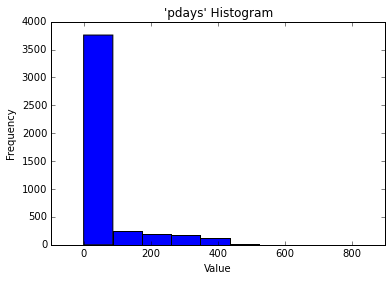

In [5]:
# Plot histogram for 'pdays', whose response structure I don't quite get, despite reading documentation.

plt.hist(bdp['pdays'])
plt.title("'pdays' Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Why doesn't histogram show "-1" values for 'pdays'?

In [4]:
# Count up # of values for 'poutcome' by response type.

bdp.poutcome.value_counts()

# Why the huge number of 'unknown' values? on the other hand, the key value tells us what we ...
#... need to know anyways.

unknown    3705
failure     490
other       197
success     129
dtype: int64

In [3]:
from sklearn import preprocessing, feature_extraction

#from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#from sklearn.feature_extraction import DictVectorizer

In [8]:
#[In]: bdp.keys():
#[Out]: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 
#        'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

In [4]:
# 'bdp_categs' is a list of categorical variables for dataframe 'bdp'

bdp_categs = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

In [8]:
# 'categs_dict' is a dictionary of categorical variables, as made by loading 'bdp_categs'

#categs_dict = bdp[bdp_categs].to_dict(outtype='records')    <-- (PREVIOUSLY EXECUTED)

In [5]:
# Call LabelEncoder() & OneHotEncoder().

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Define LabelEncoder() as 'le'

le = LabelEncoder()

# Fit 'bdp_categs' (categorical variables) for bdp (dataframe of dataset) and then transform.

#bdp[bdp_categs] = le.fit_transform(bdp[bdp_categs])    <-- (PREVIOUSLY EXECUTED)

# Output result of attempted procedure immediately above.

#bdp    <-- (PREVIOUSLY EXECUTED)

# Nope, doesn't work too well - 'bad input shape' is pretty clear message.

In [10]:
# 2nd/3rd Attempt (overall) to apply LabelEncoder.fit_transform() to all columns in dataframe 'bdp'.

bdp.apply(le.fit_transform, axis=0).head(7)

# Unfortunately, le.fit_transform() was applied to all columns (axis=0), so numerical/continuous ...
# ..were transformed/encoded as well, which isn't good bc results aren't terribly useful.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0
5,16,4,2,2,0,934,0,0,0,22,3,137,1,109,3,0,0
6,17,6,1,2,0,569,1,0,0,13,8,337,0,219,2,1,0


In [8]:
# Fit & transform 'job' column.
# 'enc_job' is the encoded form of bdp[job].

enc_job = le.fit_transform(bdp.job)
enc_job

array([10,  7,  4, ...,  9,  1,  2])

In [12]:
# Look at unique values for 'enc_job' (which is encoded version of 'bdp[job]').

np.unique(enc_job)

# Looks ok so far.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [45]:
bdp_categs

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [6]:
# Apply template procedure from 'enc_job" operation to other categorical variables.

enc_marital = le.fit_transform(bdp.marital)
enc_education = le.fit_transform(bdp.education)
enc_default = le.fit_transform(bdp.default)
enc_housing = le.fit_transform(bdp.housing)
enc_loan = le.fit_transform(bdp.loan)
enc_contact = le.fit_transform(bdp.contact)
enc_month = le.fit_transform(bdp.month)
enc_poutcome = le.fit_transform(bdp.poutcome)
enc_y = le.fit_transform(bdp.y)

In [72]:
enc_marital

array([1, 1, 2, ..., 1, 1, 2])

In [43]:
np.unique(enc_marital)

array([0, 1, 2])

In [44]:
enc_y

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
np.unique(enc_y)

array([0, 1])

In [7]:
# Redefine categorical features as equivalent to label-encoded versions of selves.
# Data types of features have been changed completely, from categorical to numerical (ordinal?).

bdp.job = le.fit_transform(bdp.job)
bdp.marital = le.fit_transform(bdp.marital)
bdp.education = le.fit_transform(bdp.education)
bdp.default = le.fit_transform(bdp.default)
bdp.housing = le.fit_transform(bdp.housing)
bdp.loan = le.fit_transform(bdp.loan)
bdp.contact = le.fit_transform(bdp.contact)
bdp.month = le.fit_transform(bdp.month)
bdp.poutcome = le.fit_transform(bdp.poutcome)
bdp.y = le.fit_transform(bdp.y)

In [9]:
# Show results of above feature transformations conducted through LabelEncoder().

bdp.head()

# Much better; categoricals were changed to numerical/ordinal through LabelEncoder(), while...
# ..continuous features kept original values (since ranking of numerical/continuous is absurd).

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [8]:
# Define OneHotEncoder() as 'ohe'.

ohe = OneHotEncoder(sparse=False)

In [20]:
# Create new one-hot-encoded versions of non-binary categorical variables.
# bdp[job] excluded since it's the target/outcome/dependent variable, and binary to boot.
# bdp[contact] excluded since it's binary.

hot_job = ohe.fit_transform(bdp.job.values)
hot_marital = ohe.fit_transform(bdp.marital.values)
hot_education = ohe.fit_transform(bdp.education.values)
hot_default = ohe.fit_transform(bdp.default.values)
hot_housing = ohe.fit_transform(bdp.housing.values)
hot_loan = ohe.fit_transform(bdp.loan.values)
hot_month = ohe.fit_transform(bdp.month.values)
hot_poutcome = ohe.fit_transform(bdp.poutcome.values)

# ^--The above doesn't work.

ValueError: need more than 1 value to unpack

In [ ]:
# Try creating a function to apply only to categorical variables ('bdp_categs') by using iterable (?)

In [10]:
# Find shape for bdp['job'], since shape is very important for OneHotEncoder() methods.

bdp['job'].shape

(4521L,)

In [13]:
# Copying the syntax below from (http://nbviewer.ipython.org/github/rasbt/pattern_classification/blob/master/preprocessing/feature_encoding.ipynb#scikit-OneHotEncoder).
# I don't even know why the double-brackets "[[]]" are necessary, nor why it works. Definitely "WTH??"

hot_job = ohe.fit_transform(bdp[['job']])

In [18]:
hot_job

# Looks alright.

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [11]:
# Create one-hot versions of originally-categorical variables that aren't binary

hot_marital = ohe.fit_transform(bdp[['marital']])
hot_education = ohe.fit_transform(bdp[['education']])
hot_default = ohe.fit_transform(bdp[['default']])
hot_housing = ohe.fit_transform(bdp[['housing']])
hot_loan = ohe.fit_transform(bdp[['loan']])
hot_month = ohe.fit_transform(bdp[['month']])
hot_poutcome = ohe.fit_transform(bdp[['poutcome']])

In [20]:
# See results of one-hot encoding.

print(hot_marital)
print(hot_education)
print(hot_default)
print(hot_housing)
print(hot_loan)
print(hot_month)
print(hot_poutcome)

[[ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 ..., 
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 ..., 
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]]
[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]
[[ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]]
[[ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]]
[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 ..., 
 [ 0.  0.  0.  1.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]]


In [12]:
# Transform all formerly-categorical-now-ordinal features into one-hot-categorical

bdp.job = ohe.fit_transform(bdp[['job']])
bdp.marital = ohe.fit_transform(bdp[['marital']])
bdp.education = ohe.fit_transform(bdp[['education']])
bdp.default = ohe.fit_transform(bdp[['default']])
bdp.housing = ohe.fit_transform(bdp[['housing']])
bdp.loan = ohe.fit_transform(bdp[['loan']])
bdp.month = ohe.fit_transform(bdp[['month']])
bdp.poutcome = ohe.fit_transform(bdp[['poutcome']])

In [16]:
# See results.

bdp.head()

# Nope, doesn't seem to have worked.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,0,1,1,1787,1,1,0,19,0,79,1,-1,0,0,0
1,33,0,0,0,1,4789,0,0,0,11,0,220,1,339,4,1,0
2,35,0,0,0,1,1350,0,1,0,16,1,185,1,330,1,1,0
3,30,0,0,0,1,1476,0,0,2,3,0,199,4,-1,0,0,0
4,59,0,0,0,1,0,0,1,2,5,0,226,1,-1,0,0,0


In [22]:
# Test by looking at only one variable.

bdp.job

# Again, nope.

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    0
...
4506    0
4507    0
4508    1
4509    0
4510    0
4511    0
4512    0
4513    0
4514    0
4515    0
4516    0
4517    0
4518    0
4519    0
4520    0
Name: job, Length: 4521, dtype: float64

In [17]:
# Look at one-hot-encoded version of bdp[job]

ohe.fit_transform(bdp[['job']])

# That seems correct. That means the features in original dataframe haven't been converted yet.

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [24]:
# Look at one-hot-encoded version of bdp[education]

ohe.fit_transform(bdp[['education']])

# Hmm...

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [25]:
# Trying to replace original categorical features in dataframe with one-hot-encoded versions

bdp.job = hot_job
bdp.marital = hot_marital
bdp.education = hot_education
bdp.default = hot_default
bdp.housing = hot_housing
bdp.loan = hot_loan
bdp.month = hot_month
bdp.poutcome = hot_poutcome

In [87]:
# See if it worked.

bdp.job

# Still no...

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    0
...
4506    0
4507    0
4508    1
4509    0
4510    0
4511    0
4512    0
4513    0
4514    0
4515    0
4516    0
4517    0
4518    0
4519    0
4520    0
Name: job, Length: 4521, dtype: float64

In [26]:
hot_job

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [18]:
bdp.columns[:1]

Index([u'age'], dtype='object')

In [19]:
bdp.columns[0:-1]

Index([u'age', u'job', u'marital', u'education', u'default', u'balance', u'housing', u'loan', u'contact', u'day', u'month', u'duration', u'campaign', u'pdays', u'previous', u'poutcome'], dtype='object')

In [20]:
bdp.columns[1:]

Index([u'job', u'marital', u'education', u'default', u'balance', u'housing', u'loan', u'contact', u'day', u'month', u'duration', u'campaign', u'pdays', u'previous', u'poutcome', u'y'], dtype='object')

In [21]:
bdp.columns[0:]

Index([u'age', u'job', u'marital', u'education', u'default', u'balance', u'housing', u'loan', u'contact', u'day', u'month', u'duration', u'campaign', u'pdays', u'previous', u'poutcome', u'y'], dtype='object')

In [22]:
bdp.columns[0:-1]

Index([u'age', u'job', u'marital', u'education', u'default', u'balance', u'housing', u'loan', u'contact', u'day', u'month', u'duration', u'campaign', u'pdays', u'previous', u'poutcome'], dtype='object')

In [23]:
# Select feature columns (every column except for the last column, bdp[y], which is [-1]).
feature_cols = bdp.columns[0:-1] 

# Define X (features) & y (response).
X = bdp[feature_cols]
y = bdp.y

In [36]:
# Import train_test_split from sklearn.cross_validation.
#from sklearn.cross_validation import train_test_split

# Split data into training & test sets.
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
# Print out each of the arrays.

#print(X_train)
#print(y_train)
#print(X_test)
#print(y_test)

In [17]:
# Import class, instantiate estimator, fit with training set
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

In [18]:
# Call DecisionTreeClassifier 'treeclf', max depth for decision tree of '3'
treeclf = DecisionTreeClassifier(max_depth=3, random_state=0)
treeclf.fit(X, y)
scores = cross_val_score(treeclf, X, y, cv = 5, scoring = 'accuracy')

NameError: name 'X' is not defined

In [26]:
# Assessing relative importance of features.

np.mean(scores)

0.88630787659512045

In [27]:
# Assessing relative importance of features.

treeclf.feature_importances_

array([ 0.04147196,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.02548503,  0.        ,
        0.        ,  0.77454926,  0.        ,  0.15849376,  0.        ,  0.        ])

In [28]:
# Assessing relative importance of features.
# 'feat_imp' equals 'feature importance'.

feat_imp = pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_}).sort('importance', ascending = False)
print feat_imp

      feature  importance
11   duration    0.774549
13      pdays    0.158494
0         age    0.041472
8     contact    0.025485
1         job    0.000000
2     marital    0.000000
3   education    0.000000
4     default    0.000000
5     balance    0.000000
6     housing    0.000000
7        loan    0.000000
9         day    0.000000
10      month    0.000000
12   campaign    0.000000
14   previous    0.000000
15   poutcome    0.000000


In [29]:
feat_imp.head(7)

,feature,importance
11,duration,0.774549
13,pdays,0.158494
0,age,0.041472
8,contact,0.025485
1,job,0.000000
2,marital,0.000000
3,education,0.000000


In [30]:
scores

array([ 0.88839779,  0.88053097,  0.89048673,  0.88827434,  0.88384956])

In [31]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.89 (+/- 0.01)


In [14]:
# Repeat above procedures with full bank dataset.
# 'bdf' stands for 'bank-data-full'

bdf = pd.read_csv('bank-additional-full.csv', sep=';', index_col=False)
bdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [34]:
bdf.keys()

Index([u'age', u'job', u'marital', u'education', u'default', u'housing', u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign', u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx', u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'], dtype='object')

In [55]:
from sklearn import preprocessing, feature_extraction

# 'bdf_categs' stands for categorical features for 'bdf'
bdf_categs = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

# 'bdf_feat_cols' is feature columns for dataframe 'bdf'
bdf_feat_cols = bdf.columns[0:-1]

In [56]:
# Define X1 (features) & y1 (response) for 'bdf'.
X1 = bdf_feat_cols
y1 = bdf.y

In [30]:
# Transform categorical features of 'bdf' to numerical

bdf.job = le.fit_transform(bdf.job)
bdf.marital = le.fit_transform(bdf.marital)
bdf.education = le.fit_transform(bdf.education)
bdf.default = le.fit_transform(bdf.default)
bdf.housing = le.fit_transform(bdf.housing)
bdf.loan = le.fit_transform(bdf.loan)
bdf.contact = le.fit_transform(bdf.contact)
bdf.month = le.fit_transform(bdf.month)
bdf.day_of_week = le.fit_transform(bdf.day_of_week)
bdf.poutcome = le.fit_transform(bdf.poutcome)
bdf.y = le.fit_transform(bdf.y)

In [20]:
bdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0


In [31]:
# Fit DecisionTreeClassifier to 'bdf'

treeclf.fit(X1, y1)
scores1 = cross_val_score(treeclf, X1, y1, cv = 5, scoring = 'accuracy')

# Failed.

ValueError: could not convert string to float: euribor3m

In [23]:
bdf.keys()

Index([u'age', u'job', u'marital', u'education', u'default', u'housing', u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign', u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx', u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'], dtype='object')

In [36]:
# Convert following features to numerical

bdf['emp.var.rate'] = le.fit_transform(bdf['emp.var.rate'])
bdf['cons.price.idx'] = le.fit_transform(bdf['cons.price.idx'])
bdf['cons.conf.idx'] = le.fit_transform(bdf['cons.conf.idx'])
bdf['euribor3m'] = le.fit_transform(bdf['euribor3m'])
bdf['nr.employed'] = le.fit_transform(bdf['nr.employed'])

In [37]:
bdf.dtypes

age               int64
job               int32
marital           int32
education         int32
default           int32
housing           int32
loan              int32
contact           int32
month             int32
day_of_week       int32
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome          int32
emp.var.rate      int32
cons.price.idx    int32
cons.conf.idx     int32
euribor3m         int32
nr.employed       int32
y                 int32
dtype: object

In [38]:
# Attempt 2 of fitting DecisionTreeClassifier after processing data

treeclf.fit(X1, y1)
scores1 = cross_val_score(treeclf, X1, y1, cv = 5, scoring = 'accuracy')

ValueError: could not convert string to float: euribor3m

In [44]:
bdf = bdf.drop(bdf['euribor3m'])

In [47]:
bdf.keys()

Index([u'age', u'job', u'marital', u'education', u'default', u'housing', u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign', u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx', u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'], dtype='object')

In [48]:
bdf_feat_cols = bdf.columns[0:-1]

In [52]:
bdf = bdf.drop(['euribor3m'], axis=1)

In [53]:
bdf.keys()

Index([u'age', u'job', u'marital', u'education', u'default', u'housing', u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign', u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx', u'cons.conf.idx', u'nr.employed', u'y'], dtype='object')

In [57]:
# Attempt 3 at DecisionTreeClassifier after dropping 'euribor3m'

treeclf.fit(X1, y1)
scores1 = cross_val_score(treeclf, X1, y1, cv = 5, scoring = 'accuracy')

ValueError: could not convert string to float: nr.employed